In [2]:
import numpy as np

In [3]:
categories = np.array([
    "Food", "Transport", "Rent", "Shopping", "Bills",
    "Medicine", "Travel", "Entertainment", "Other"
])

In [7]:
import numpy as np

np.random.seed(42)  # for reproducibility

# Number of transactions
n = 2000

amounts = np.random.randint(50, 5000, size=n)        # random expense amount  
category_ids = np.random.randint(0, len(categories), size=n)  # pick random category  
days = np.random.randint(1, 31, size=n)              # day  
months = np.random.randint(1, 13, size=n)            # month  
years = np.random.randint(2022, 2025, size=n)        # year  

# Combine everything into one array
expense_data = np.column_stack((amounts, category_ids, days, months, years))

expense_data[:5]


array([[ 910,    6,   28,    5, 2024],
       [3822,    2,    8,   10, 2024],
       [3142,    7,    1,    3, 2023],
       [ 516,    5,    5,    2, 2024],
       [4476,    4,   22,    3, 2024]], dtype=int32)

In [9]:
expense_categories = categories[expense_data[:,1]]

In [10]:
def monthly_expense(data, month):
    return data[data[:,3] == month][:,0].sum()

for m in range(1, 13):
    print("Month", m, ":", monthly_expense(expense_data, m))


Month 1 : 398385
Month 2 : 455834
Month 3 : 436688
Month 4 : 421633
Month 5 : 436153
Month 6 : 446342
Month 7 : 499655
Month 8 : 374164
Month 9 : 407652
Month 10 : 486711
Month 11 : 361033
Month 12 : 389461


In [11]:
def category_expense(data, cat_id):
    return data[data[:,1] == cat_id][:,0].sum()

for i, cat in enumerate(categories):
    print(cat, ":", category_expense(expense_data, i))


Food : 583024
Transport : 508223
Rent : 593816
Shopping : 615568
Bills : 599776
Medicine : 561014
Travel : 522754
Entertainment : 525327
Other : 604209


In [12]:
BUDGET = 20000

for m in range(1, 13):
    total = monthly_expense(expense_data, m)
    if total > BUDGET:
        print(f"⚠️ Month {m}: Overspent by ₹{total - BUDGET}")


⚠️ Month 1: Overspent by ₹378385
⚠️ Month 2: Overspent by ₹435834
⚠️ Month 3: Overspent by ₹416688
⚠️ Month 4: Overspent by ₹401633
⚠️ Month 5: Overspent by ₹416153
⚠️ Month 6: Overspent by ₹426342
⚠️ Month 7: Overspent by ₹479655
⚠️ Month 8: Overspent by ₹354164
⚠️ Month 9: Overspent by ₹387652
⚠️ Month 10: Overspent by ₹466711
⚠️ Month 11: Overspent by ₹341033
⚠️ Month 12: Overspent by ₹369461


In [13]:
def monthly_savings(data, month, budget):
    total = monthly_expense(data, month)
    return budget - total

for m in range(1, 13):
    print("Month", m, "Savings:", monthly_savings(expense_data, m, BUDGET))


Month 1 Savings: -378385
Month 2 Savings: -435834
Month 3 Savings: -416688
Month 4 Savings: -401633
Month 5 Savings: -416153
Month 6 Savings: -426342
Month 7 Savings: -479655
Month 8 Savings: -354164
Month 9 Savings: -387652
Month 10 Savings: -466711
Month 11 Savings: -341033
Month 12 Savings: -369461


NO savings in this year

In [30]:
def check_alert(data, month, limit):
    total = data[data[:,3] == month][:,0].sum()
    if total > limit:
        print(f"⚠ ALERT: Month {month} crossed limit — spent {total}")
    else:
        print(f"✔ Month {month} is under limit — spent {total}")
check_alert(expense_data, month=m, limit=20000)


⚠ ALERT: Month 12 crossed limit — spent 389461


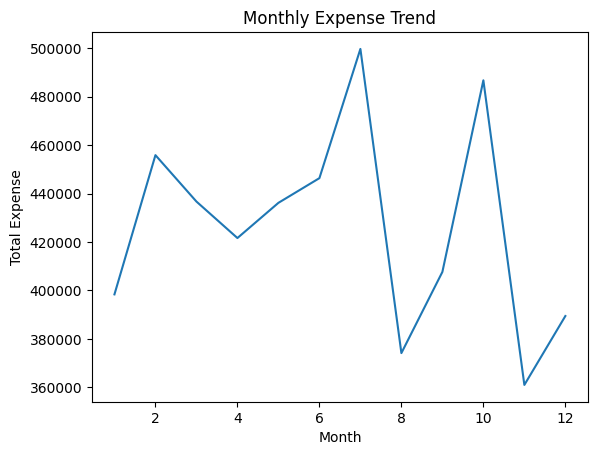

In [14]:
import matplotlib.pyplot as plt

monthly_totals = [monthly_expense(expense_data, m) for m in range(1,13)]

plt.plot(range(1,13), monthly_totals)
plt.xlabel("Month")
plt.ylabel("Total Expense")
plt.title("Monthly Expense Trend")
plt.show()


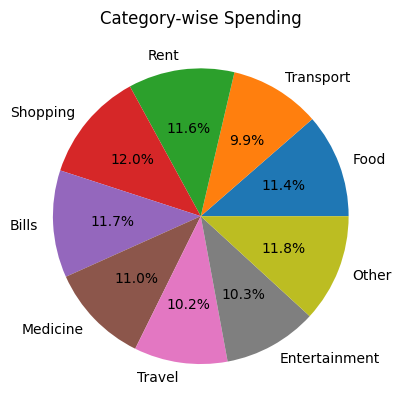

In [15]:
category_totals = [category_expense(expense_data, i) for i in range(len(categories))]

plt.pie(category_totals, labels=categories, autopct='%1.1f%%')
plt.title("Category-wise Spending")
plt.show()


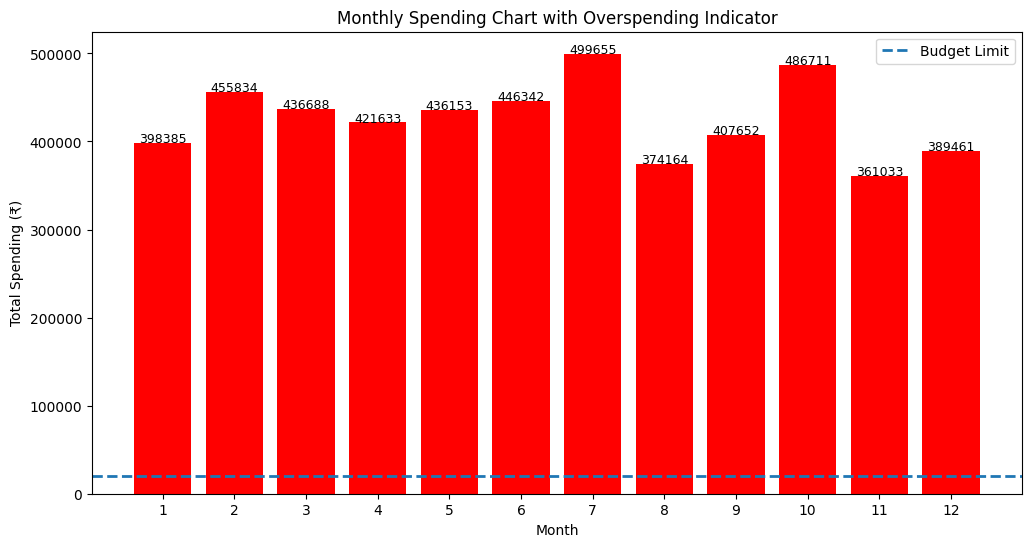

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Example: assume expense_data and categories already exist
budget = 20000  # monthly budget limit

# Calculate total expense per month
monthly_spending = np.array([expense_data[expense_data[:,3] == m][:,0].sum() for m in range(1,13)])

months = np.arange(1, 13)

# Create bar colors (red if overspending, green if safe)
colors = ['red' if total > budget else 'green' for total in monthly_spending]

plt.figure(figsize=(12,6))
plt.bar(months, monthly_spending, color=colors)

# Add budget line
plt.axhline(y=budget, linestyle='--', label='Budget Limit', linewidth=2)

plt.title("Monthly Spending Chart with Overspending Indicator")
plt.xlabel("Month")
plt.ylabel("Total Spending (₹)")
plt.xticks(months)

# Show values on the bar
for i, value in enumerate(monthly_spending):
    plt.text(i+1, value + 500, str(int(value)), ha='center', fontsize=9)

plt.legend()
plt.show()


In [16]:
print("=== YEARLY EXPENSE REPORT ===")
print("Total Transactions:", len(expense_data))

print("\n--- Category Breakdown ---")
for i, cat in enumerate(categories):
    print(cat, ":", category_expense(expense_data, i))

print("\n--- Monthly Breakdown ---")
for m in range(1, 13):
    print("Month", m, ":", monthly_expense(expense_data, m))


=== YEARLY EXPENSE REPORT ===
Total Transactions: 2000

--- Category Breakdown ---
Food : 583024
Transport : 508223
Rent : 593816
Shopping : 615568
Bills : 599776
Medicine : 561014
Travel : 522754
Entertainment : 525327
Other : 604209

--- Monthly Breakdown ---
Month 1 : 398385
Month 2 : 455834
Month 3 : 436688
Month 4 : 421633
Month 5 : 436153
Month 6 : 446342
Month 7 : 499655
Month 8 : 374164
Month 9 : 407652
Month 10 : 486711
Month 11 : 361033
Month 12 : 389461
